In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,ALink,SName,SLink,Lyric,Idiom,artist,genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...


In [130]:
lc = df['Lyric']

## Exploring Lyrics Column

#### How is the song length distributed

In [131]:
lc.str.len().describe()

count    47635.000000
mean      1068.924740
std        556.149603
min          9.000000
25%        731.000000
50%        998.000000
75%       1311.000000
max      19578.000000
Name: Lyric, dtype: float64

#### Maximum song length in the 99th quantile

In [132]:
lc.str.len().quantile(0.99)

2695.659999999996

#### Plotting the 95th quantile

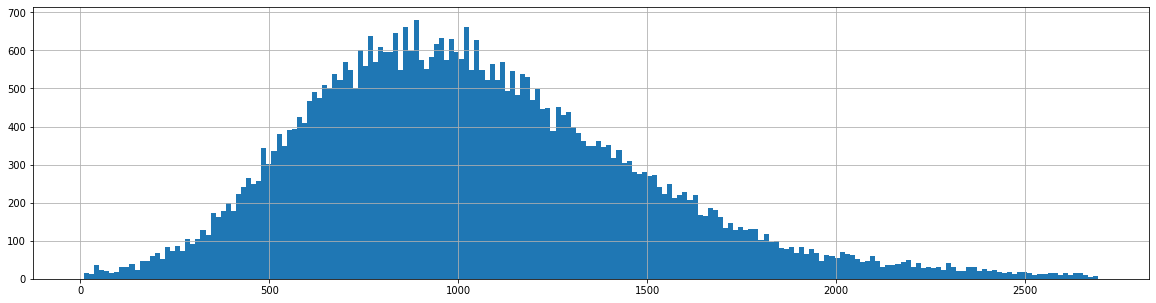

In [133]:
lc[lc.str.len() < 2695].str.len().hist(figsize=(20,5), bins=200)

In [135]:
df_cleaned = df[(lc.str.len() > 30) & (lc.str.len() < 2695)]

#### Duplicated values

In [138]:
df_cleaned = df_cleaned.drop_duplicates(subset='Lyric')

#### Removing songs with chords, i.e '------'

In [139]:
df_cleaned = df_cleaned[~lc.str.contains('------')]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [140]:
df_cleaned

,ALink,SName,SLink,Lyric,Idiom,artist,genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,10000 Maniacs,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
...,...,...,...,...,...,...,...,...
47630,/zz-top/,Whiskey'n Mama,/zz-top/whiskeyn-mama.html,"I'm so tired, you on my head.. Whiskey'n mama,...",ENGLISH,ZZ Top,Rock,Rock; Blues; Hard Rock; Country; Hardcore; Sof...
47631,/zz-top/,Woke Up With Wood,/zz-top/woke-up-with-wood.html,When I woke up this morning. I was feeling mig...,ENGLISH,ZZ Top,Rock,Rock; Blues; Hard Rock; Country; Hardcore; Sof...
47632,/zz-top/,World of Swirl,/zz-top/world-of-swirl.html,"I hit the street running, had an angle in mind...",ENGLISH,ZZ Top,Rock,Rock; Blues; Hard Rock; Country; Hardcore; Sof...
47633,/zz-top/,Your Legs Are As Hairy As My Beard,/zz-top/your-legs-are-as-hairy-as-my-beard.html,I've got a beard. And it is long. And you've g...,ENGLISH,ZZ Top,Rock,Rock; Blues; Hard Rock; Country; Hardcore; Sof...


In [142]:
cols = ['Lyric', 'SName', 'artist']
df_cleaned[cols].to_csv('lyrics_artist_sname.csv', index=False)